In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('covid_delhi_sample.csv')

In [17]:
# data to datetime
df['date'] = pd.to_datetime(df['date'])

#recoveries rate
df['recovery_rate'] = np.round(df['recovered'] / df['confirmed']* 100, 2)

# deaths rate
df['death_rate'] = np.round(df['deceased'] / df['confirmed'] * 100, 2)

#daily new cases
df['daily_new_cases'] = np.insert(np.diff(df['confirmed']) , 0, 0)

#weekly new cases
df['weekly_new_cases'] = np.round(df['daily_new_cases'].rolling(window=7).mean() ,2)
print(df.head())

        date  state  confirmed  recovered  deceased  recovery_rate  \
0 2020-04-01  Delhi        311        233         9          74.92   
1 2020-04-02  Delhi        752        433        18          57.58   
2 2020-04-03  Delhi       1095        632        26          57.72   
3 2020-04-04  Delhi       1535        842        50          54.85   
4 2020-04-05  Delhi       2013       1113        74          55.29   

   death_rate  daily_new_cases  weekly_new_cases  
0        2.89                0               NaN  
1        2.39              441               NaN  
2        2.37              343               NaN  
3        3.26              440               NaN  
4        3.68              478               NaN  


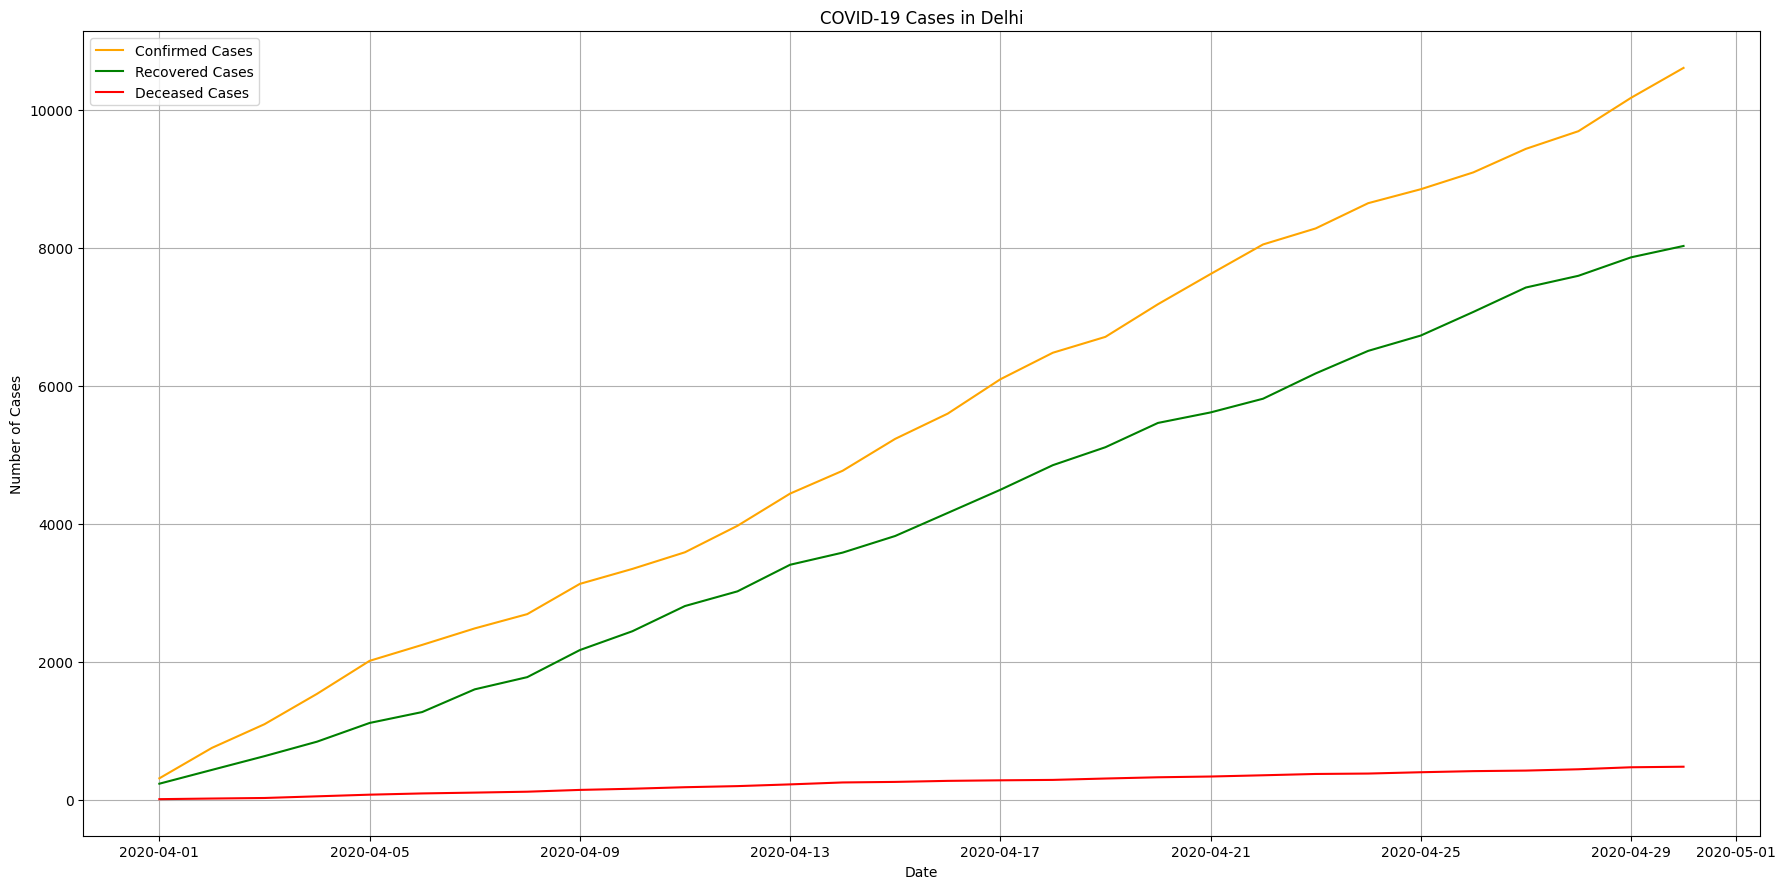

In [7]:
# graph of recovery rate, deceased rate

plt.figure(figsize=(18, 9)) 
plt.plot(df['date'], df['confirmed'], label='Confirmed Cases', color='orange')
plt.plot(df['date'], df['recovered'], label='Recovered Cases', color='green')
plt.plot(df['date'], df['deceased'], label='Deceased Cases', color='red')
plt.title('COVID-19 Cases in Delhi')
plt.xlabel('Date')
plt.ylabel('Number of Cases')   
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

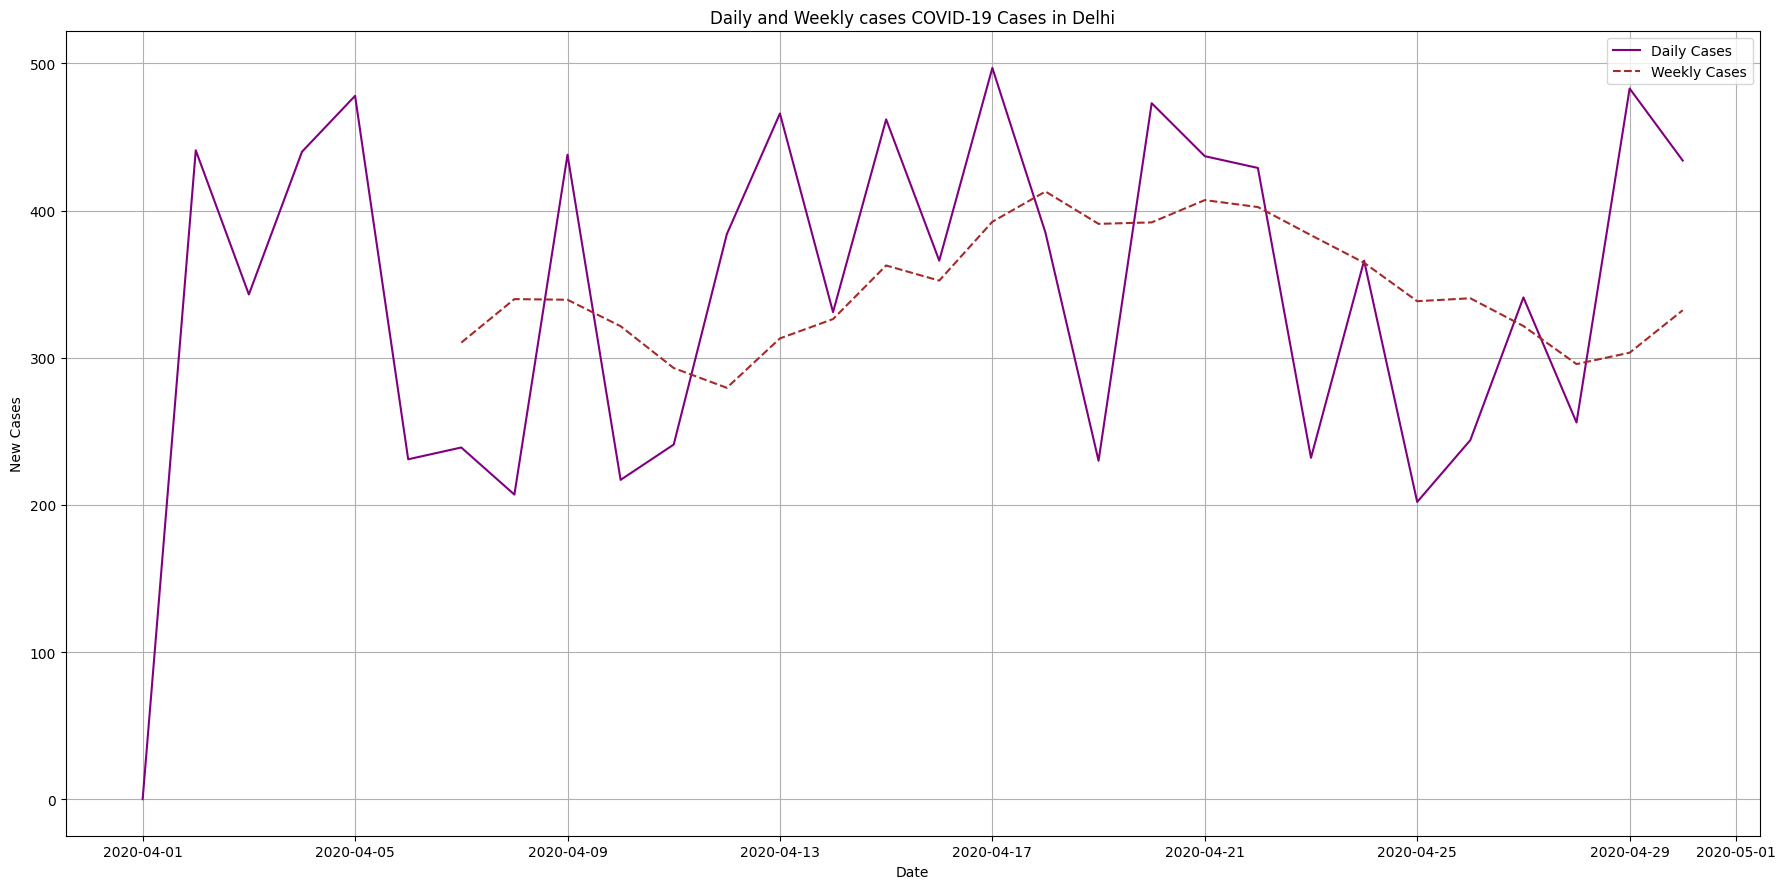

In [27]:
# daily new cases and weekly cases graph
plt.figure(figsize=(18, 9))
plt.plot(df['date'], df['daily_new_cases'], label='Daily Cases', color='purple')
plt.plot(df['date'], df['weekly_new_cases'], label='Weekly Cases', color='brown', linestyle='--')
plt.title('Daily and Weekly cases COVID-19 Cases in Delhi')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

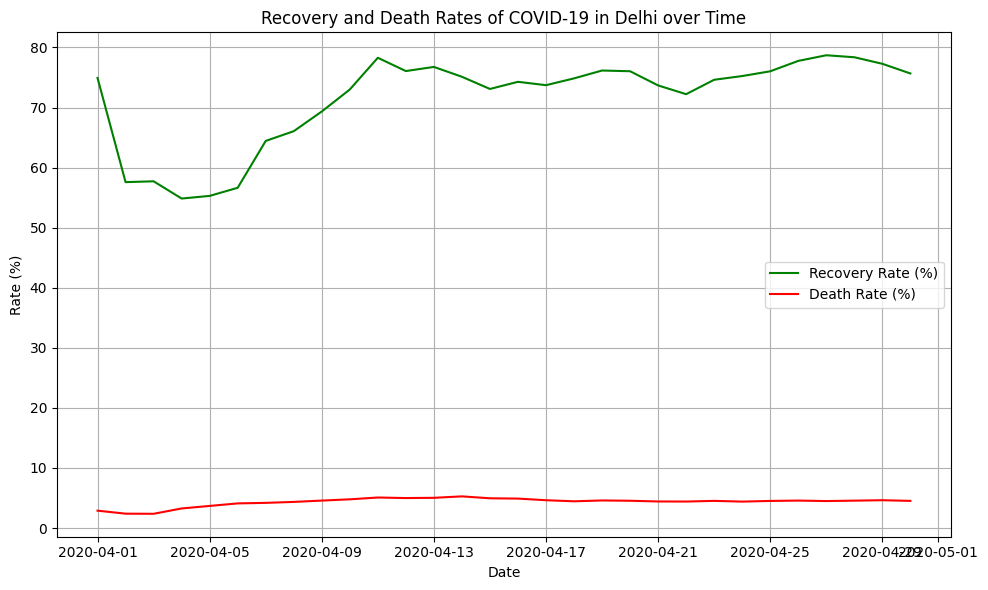

In [25]:
# recoveries rate and deaths rate graph
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['recovery_rate'], label='Recovery Rate (%)', color='green')
plt.plot(df['date'], df['death_rate'], label='Death Rate (%)', color='red')
plt.title('Recovery and Death Rates of COVID-19 in Delhi over Time')  
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)  
plt.tight_layout()
plt.show()